FINAL PROJECT SUBMISSION
* Student names:
1. Benson Kamau
2. Kevin Muchori
3. Nancy Chelangat
4. Breden Mugambi
5. Sally Kinyanjui

* Student pace: Full time

* Scheduled project review date/time: N/A

* Instructor name: Nikita Njoroge


## MODELING HOUSE PRICES USING DIFFERENT HOUSE FEATURES IN KING COUNTY

BUSINESS UNDERSTANDING

#### Problem Statement
We have been tasked with the role of analysing the given dataset to show how different features of a house impact its sale price. By understanding these features and their impacts, we can advise sellers(homeowners or developers) on how to enhance their property to maximize sale price and assist buyers in evaluating potential homes.

#### Main Objective

To build and evaluate models using various combinations of the available features in the King County.


Specific Objectives

1. To evaluate how the number of floors impacts the price of a house in King County.
2. To determine how the number of bedrooms impacts the price of a house in King County.
3. To examine the impact the number of bathrooms has on the price of a house in King County.
4. To assess the impact of renovations on the price of a house in King County.
5. To determine how the square footage of living space of a house impacts its price in King County.
6. To evaluate which combinations of the available features in the dataset are the most impactful features for predicting sale price.


DATA UNDERSTANDING

This project analyzes data about homes sold in King County, Washington between May 2014 and May 2015 in order to make recommendations to relevant stakeholders.

This dataset is housed in the kc_house_data.csv file within the project's data folder and the columns outlined in the accompanying column_names.md file.


In [2]:
#This code section allows for reading of files from Google drive
#It is only applicable when working with IDEs that cannot read the data in the github files
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#import the relevant library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

# Define the DataFrame in the global scope
df = pd.DataFrame()

#create a function that loads data and gets the info about the data.
def load_and_get_info(file_path):
    """
    Load data from a CSV file and get information about the DataFrame.

    Parameters:
    - file_path (str): Path to the CSV file.

    Returns:
    - df_info (str): Information about the DataFrame.
    """
    # Load data
    global df
    df = pd.read_csv(file_path)

    # Display the first few rows of the DataFrame
    df_head = df.head()

    # Get information about the DataFrame
    df_info = df.info()

    return df_info, df_head

file_path = 'data/kc_house_data.csv'
#The commented filepath below is only used when the data is in the drive, otherwise it is not needed
#file_path = '/content/drive/MyDrive/data/kc_house_data.csv' 
data_info, data_head = load_and_get_info(file_path)
print(data_info)
print("\nFirst few rows of the DataFrame:")
data_head



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


This dataset contains records of 21,597 home sales. It includes:

How much the house sold for

Square footage of the house's living space

Square footage of the lot

Number of floors, bedrooms, and bathrooms

The quality of the view from the house

Whether the house is on a waterfront

The house's grade (relates to construction materials and quality)

The house's condition (relates to age and maintenance)

The year the house was built

The year the house was renovated

The location of the house

The following columns have missing values:
1. waterfront
2. yr_renovated

In [4]:
def check_dtypes(df):
    """
    Check data types and identify the kind of variable for each column in the DataFrame.

    Parameters:
    - df (DataFrame): Input DataFrame.

    Returns:
    - dtypes_info (DataFrame): DataFrame containing information about data types and variable types.
    """
    # Get data types of each column
    dtypes = df.dtypes

    # Identify variable types (numeric or categorical) for each column
    variable_types = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            variable_types.append('Numeric')
        else:
            variable_types.append('Categorical')

    # Create DataFrame to store information
    dtypes_info = pd.DataFrame({'Column': dtypes.index, 'Data Type': dtypes.values, 'Variable Type': variable_types})

    return dtypes_info

data_types_info = check_dtypes(df)
print(data_types_info)

           Column Data Type Variable Type
0              id     int64       Numeric
1            date    object   Categorical
2           price   float64       Numeric
3        bedrooms     int64       Numeric
4       bathrooms   float64       Numeric
5     sqft_living     int64       Numeric
6        sqft_lot     int64       Numeric
7          floors   float64       Numeric
8      waterfront    object   Categorical
9            view    object   Categorical
10      condition    object   Categorical
11          grade    object   Categorical
12     sqft_above     int64       Numeric
13  sqft_basement    object   Categorical
14       yr_built     int64       Numeric
15   yr_renovated   float64       Numeric
16        zipcode     int64       Numeric
17            lat   float64       Numeric
18           long   float64       Numeric
19  sqft_living15     int64       Numeric
20     sqft_lot15     int64       Numeric


The data in the columns is further divided into two categories:

1.	Numeric data : id , yr_built , yr_renovated , price , bedrooms , bathrooms , sqft_living , sqft_above , sqft_lot , floors , zipcode , lat , long , sqft_living15 , sqft_lot15

2.	Categorical data : date , waterfront , view , condition , grade , sqft_basement

## Data Preparation.

In [5]:
# Define a custom function to transform the yr_renovated column and drop the column after transformation
def transform_and_drop_yr_renovated(df):
    """
    Transform yr_renovated column to read 'Yes' if there is a year recorded,
    and 'No' if there is no year in the record. Then drop the original
    yr_renovated column.

    Parameters:
    - df (DataFrame): Input DataFrame.

    Returns:
    - df_transformed (DataFrame): Transformed DataFrame with dropped column.
    """
    # Define a custom function to transform the yr_renovated column
    def transform_yr_renovated(value):
        if pd.notnull(value) and value != 0:  # Check if value is not NaN and not equal to 0
            return 'Yes'
        else:
            return 'No'

    # Apply the custom function to transform the yr_renovated column
    df['house_renovation'] = df['yr_renovated'].apply(transform_yr_renovated)

    # Drop the original yr_renovated column
    df = df.drop(columns=['yr_renovated'])

    return df

# Apply the custom function to transform and drop yr_renovated column
df = transform_and_drop_yr_renovated(df)

# Print the transformed DataFrame
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,house_renovation
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,No
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,Yes
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,No
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,No
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,No


Each row represents information about a specific house, and each column provides different characteristics of the houses for example the house with id 7129300520 goes for the price of 221900,has three bedrooms,one bathroom,a squarefeet of 1180,a squarefeet lot of 5650.
This is the same criteria we use in for the other houses.


This function transform_and_drop_yr_renovated(df)  transforms the 'yr_renovated' column in a DataFrame and then drops the original column we now have a column stating whether the house renovation took place or not replacing the column there which was showing what year the renovation took place.

This transformation allows you to categorize whether each house has been renovated ('Yes') or not ('No'), based on the presence or absence of a renovation year in the original 'yr_renovated' column.

The df.head() statement prints the first few rows of the transformed DataFrame to check the result.

checking for null and duplicate values function.

In [6]:
def check_null_and_duplicates(df):
    """
    Check for both null values and duplicated rows in a DataFrame.

    Parameters:
    - df: DataFrame
        The DataFrame to check.

    Returns:
    - info_df: DataFrame
        DataFrame containing information about null values and duplicated rows.
    """
    # Check for null values
    null_values = df.isnull().sum()
    if null_values.sum() > 0:
        print("Null Values:")
        print(null_values)
    else:
        print("No Null Values Found.")

    # Check for duplicated rows
    duplicated_rows = df.duplicated().sum()
    if duplicated_rows > 0:
        print("\nDuplicated Rows Found:", duplicated_rows)
        duplicated_df = df[df.duplicated()]
        print(duplicated_df)
    else:
        print("\nNo Duplicated Rows Found.")
        duplicated_df = pd.DataFrame()  # Empty DataFrame if no duplicates

    # Create a DataFrame to store information
    info_df = pd.DataFrame({
        'Column': null_values.index,
        'Null Count': null_values.values,
        'Duplicated Rows': duplicated_rows
    })
    return info_df
info_df= check_null_and_duplicates(df)
print (info_df)

Null Values:
id                     0
date                   0
price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront          2376
view                  63
condition              0
grade                  0
sqft_above             0
sqft_basement          0
yr_built               0
zipcode                0
lat                    0
long                   0
sqft_living15          0
sqft_lot15             0
house_renovation       0
dtype: int64

No Duplicated Rows Found.
              Column  Null Count  Duplicated Rows
0                 id           0                0
1               date           0                0
2              price           0                0
3           bedrooms           0                0
4          bathrooms           0                0
5        sqft_living           0                0
6           sqft_lot           0                0
7             floors  

'waterfront' column has 2376 null values.

'view' column has 63 null values.

All other columns have zero null values.

No Duplicated Rows Found: This line indicates that there are no duplicated rows in DataFrame.

## Function for dropping duplicates,nulls and column names and replacing values.
So we will use the Python function 'dropper'. This function is used for cleaning a dataframe by dropping duplicates,null values and separated columns.In the function below we also include replacing the NaN values in our waterfront column with None.

In [7]:
def dropper(df, one=None, two=None, three=None):
    '''
    Input: DataFrame, request 1,request 2, request 3
    requests:
    'duplicates' to drop duplicates
    'nulls' to drop null values
    list containing df column names l = ['','','']
    '''
    request = [one,two,three]
    if 'duplicates' in request:
        df = df.drop_duplicates()
    if 'nulls' in request:
        df = df.dropna()
    for req in request:
        if isinstance(req, list):
            df = df.drop(columns=req, axis=1).reset_index(drop=True)
    return(df)


print("First few rows of the DataFrame:")

#Changing values for our column waterfront
# Assuming your DataFrame is named df
df['waterfront'] = df['waterfront'].fillna('NONE')
print(df['waterfront'].value_counts())

df.head(10)

First few rows of the DataFrame:
waterfront
NO      19075
NONE     2376
YES       146
Name: count, dtype: int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,house_renovation
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NONE,NONE,...,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,No
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,Yes
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,No
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,No
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,No
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,98053,47.6561,-122.005,4760,101930,No
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,98003,47.3097,-122.327,2238,6819,No
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,98198,47.4095,-122.315,1650,9711,No
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,98146,47.5123,-122.337,1780,8113,No
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,98038,47.3684,-122.031,2390,7570,No


After finding the number of null values in the previous function, we have now dropped our null values using df =df.dropna()

In this dataframe, we have changed the output of waterfront column from NaN to None using the fill.na().
the column waterfront has the data type interger.

'NO': There are 19075 occurrences of 'NO' in the 'waterfront' column. This indicates that these properties do not have a waterfront view.

'NONE': There are 2376 occurrences of 'NONE' in the 'waterfront' column. This likely indicates that these records originally had missing values (NaN) for the waterfront attribute, and they have been replaced with the string 'NONE'.

'YES': There are 146 occurrences of 'YES' in the 'waterfront' column. This indicates that these properties have a waterfront view.

## Checking for outliers.

Outliers are simply data points that differ from the rest of the dataset.

They may distort statistical measures leading to misinterpretation of data.

For us to check for outliers we are needed to focus on the columns such as "price","bedrooms","bathrooms","sqft_living","sqft_lot", which are numerical columns.
We will use the function 'detect_outliers' to identify the outliers.

In [8]:
import pandas as pd
import numpy as np

def detect_outliers(df, features):
    """
    Detect outliers in the specified numeric features of the dataframe.

    Parameters:
    - df: DataFrame containing the data.
    - features: List of numeric feature names to check for outliers.

    Returns:
    - Dictionary containing outlier indices for each feature.
    """
    outlier_indices = {}
    for feature in features:
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        # Calculate the outlier step
        outlier_step = 1.5 * IQR
        # Determine outliers
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices[feature] = outlier_list_col
    return outlier_indices

# Example usage:
# Numeric features to check for outliers
numeric_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
# Detect outliers
outliers = detect_outliers(df, numeric_features)
# Print outlier indices for each feature
for feature, indices in outliers.items():
    print(f"Outliers in {feature}: {indices}")


Outliers in price: Index([    5,    21,    49,    69,   125,   153,   216,   246,   269,   270,
       ...
       21509, 21514, 21516, 21524, 21535, 21552, 21560, 21574, 21581, 21584],
      dtype='int64', length=1158)
Outliers in bedrooms: Index([  154,   209,   232,   239,   264,   331,   350,   465,   486,   527,
       ...
       21170, 21210, 21224, 21310, 21316, 21359, 21427, 21503, 21506, 21536],
      dtype='int64', length=530)
Outliers in bathrooms: Index([    5,    75,   235,   270,   300,   419,   450,   471,   509,   527,
       ...
       21490, 21498, 21504, 21514, 21516, 21535, 21545, 21560, 21577, 21584],
      dtype='int64', length=561)
Outliers in sqft_living: Index([    5,    70,   115,   153,   239,   269,   270,   300,   313,   314,
       ...
       21505, 21509, 21514, 21516, 21524, 21535, 21545, 21560, 21574, 21584],
      dtype='int64', length=571)
Outliers in sqft_lot: Index([    5,    12,    21,    36,    41,    49,    60,    69,    70,    74,
       ...
    

The above output indicates that outliers were detected in the price column and the indices of the outliers.

There are 1158 outliers in price. This means there are 1158 houses whose prices are significantly different from the rest in the dataset.

There are 530 outliers in the number of bedrooms. These are houses with an unusual number of bedrooms compared to others.

There are 561 outliers in the number of bathrooms. Similar to bedrooms, these houses have an unusual number of bathrooms.

There are 571 outliers in the size of the living area. These houses have an exceptionally large or small living area compared to others.

There are outliers in the size of the lot as well, but the number of outliers is so large that it's difficult to mention the exact count. These houses have unusually large or small lots compared to others.

We are going ahead to drop the outliers in our dataset.

In [9]:
def drop_outliers(df, outliers):
    """
    Drop outliers from the DataFrame.

    Parameters:
    - df: DataFrame containing the data.
    - outliers: Dictionary containing outlier indices for each feature.

    Returns:
    - DataFrame with outliers removed.
    """
    # Combine outlier indices from all features
    outlier_indices = []
    for indices in outliers.values():
        outlier_indices.extend(indices)
    # Drop duplicate indices
    outlier_indices = list(set(outlier_indices))
    # Drop outliers from DataFrame
    df_cleaned = df.drop(outlier_indices)
    return df_cleaned

# Example usage:
# Numeric features to check for outliers
numeric_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
# Detect outliers
outliers = detect_outliers(df, numeric_features)
# Drop outliers
df_cleaned = drop_outliers(df, outliers)
df_cleaned

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,house_renovation
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NONE,NONE,...,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,No
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,Yes
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,No
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,No
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,98103,47.6993,-122.346,1530,1509,No
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,98146,47.5107,-122.362,1830,7200,No
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,98144,47.5944,-122.299,1020,2007,No
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NONE,NONE,...,8 Good,1600,0.0,2004,98027,47.5345,-122.069,1410,1287,No


This drop_outliers function takes the DataFrame df and the outlier indices obtained from detect_outliers function as inputs and returns a DataFrame with the outliers removed.







In [10]:
# Step 1: Define numeric features
numeric_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

# Step 2: Detect outliers
outliers = detect_outliers(df, numeric_features)

# Step 3: Drop outliers
df_cleaned = drop_outliers(df, outliers)

# Optional: Check the shape of the cleaned DataFrame
print("Shape of original DataFrame:", df.shape)
print("Shape of cleaned DataFrame:", df_cleaned.shape)


Shape of original DataFrame: (21597, 21)
Shape of cleaned DataFrame: (17702, 21)


This output shows that we managed to remove outliers from the dataframe because initially the dataframe has 21597 rows and after cleaning the data and removing the outliers, we were left with 17702. So a  significant portion of the data points were identified as outliers and were removed.

In [11]:
df_cleaned.isna().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                53
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
house_renovation     0
dtype: int64

The view column appears to have 53 null values. So I went ahead and dropped them using the .dropna() function.

In [12]:
df_cleaned.dropna(inplace= True)

From the cleaned dataframe I dropped  the null values.

In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17649 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                17649 non-null  int64  
 1   date              17649 non-null  object 
 2   price             17649 non-null  float64
 3   bedrooms          17649 non-null  int64  
 4   bathrooms         17649 non-null  float64
 5   sqft_living       17649 non-null  int64  
 6   sqft_lot          17649 non-null  int64  
 7   floors            17649 non-null  float64
 8   waterfront        17649 non-null  object 
 9   view              17649 non-null  object 
 10  condition         17649 non-null  object 
 11  grade             17649 non-null  object 
 12  sqft_above        17649 non-null  int64  
 13  sqft_basement     17649 non-null  object 
 14  yr_built          17649 non-null  int64  
 15  zipcode           17649 non-null  int64  
 16  lat               17649 non-null  float64
 17

From the information above obtained from the kc.house data_csv  after cleaning my data,I was able to observe the following:

The total number of entries was 17702.

There was both Numerical and categorical data:

a)Numerical data:  id , yr_built , yr_renovated , price , bedrooms , bathrooms , sqft_living , sqft_above , sqft_lot , floors , zipcode , lat , long , sqft_living15 , sqft_lot15

b)categorical data: date , waterfront , view , condition , grade , sqft_basement

**Dropping columns that will not be used during this study.**

The following columns will be dropped: ['date', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [14]:
columns_to_drop = ['date', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)
df_cleaned

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,house_renovation
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NONE,NONE,Average,7 Average,1180,1955,No
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,1951,Yes
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,1933,No
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,1965,No
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,1987,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,2009,No
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,2014,No
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,2009,No
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NONE,NONE,Average,8 Good,1600,2004,No


## **DATA ANALYSIS**

This section deals with the objectives of the project, and it involves thorough analysis of the data present and visualization to establish relationships and behaviors between elements in the table

Objective 1: To evaluate how the number of floors impacts the price of a house in King County  

Following the first objective , we aim to find out of the number of floors impact the price of the houses in King county. We first check the contents of the "floors" column and using a sample size of 50, we can view the contents contained.
We then check the contents of the "price column using the same sample size for easier viewing. During visualization, all data points will be used

In [15]:
df_cleaned['floors'].sample(50)

12001    2.0
12560    1.0
18954    1.0
11113    1.0
5037     1.0
7412     1.0
12096    1.0
6242     2.0
17198    1.0
7892     2.0
15873    1.0
11412    1.0
3654     1.0
4793     1.0
322      1.0
15848    1.0
8995     2.0
220      2.0
2991     1.0
9083     1.5
17291    2.0
768      1.0
13279    1.0
1100     2.0
3961     1.5
736      1.0
15883    2.0
1386     2.0
9327     2.0
7907     2.0
17131    1.0
1035     1.0
3670     1.0
9985     1.0
4205     2.0
15143    1.0
7166     1.0
17987    1.0
13109    2.0
11385    2.0
3036     1.0
14815    2.0
20841    2.0
5021     1.0
6438     1.0
8186     1.0
2549     1.0
11224    1.0
8457     1.0
4702     1.0
Name: floors, dtype: float64

In [16]:
df_cleaned['price'].sample(50)

13179     470000.0
13054     252000.0
16109     382500.0
21341    1070000.0
8186      339950.0
15221     935000.0
20948     533380.0
12162     626000.0
17656     710000.0
4896      350000.0
17788     508450.0
6601      675000.0
19111     275400.0
11295     492000.0
17813     950000.0
16865     566000.0
15088     490000.0
3457      640000.0
18507     287500.0
2414      286700.0
20691     380000.0
9671      479000.0
21037     775900.0
11223     358500.0
18665     746300.0
12098     222000.0
20916     286950.0
9651      657500.0
12809     343000.0
1142      687500.0
7031      717000.0
16231     550000.0
855       370500.0
6813      269500.0
12415     230000.0
8395      248000.0
15079     423000.0
16576     568500.0
4151      415000.0
4205      825000.0
19824     300000.0
2135      251700.0
19333     365000.0
20971     477500.0
5476      725000.0
68        204000.0
21239     471835.0
3011      200450.0
3362      406000.0
8342      455000.0
Name: price, dtype: float64

Next, we sort the data in ascending order in order to gain an easier progression of the floor and for easier readability. After that, we can plot a scatter plot to visually see the relationship between floors and pricing in houses in King County

In [17]:
sorted_df_floors = df_cleaned.sort_values(by=['floors'])
sorted_df_price = df_cleaned.sort_values(by=['price'])
sorted_df_floors['floors']

0        1.0
9913     1.0
9915     1.0
18016    1.0
9917     1.0
        ... 
10066    3.5
14871    3.5
11582    3.5
20756    3.5
20292    3.5
Name: floors, Length: 17649, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_4152\3382943146.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cividis')  # Or any other colormap you prefer


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

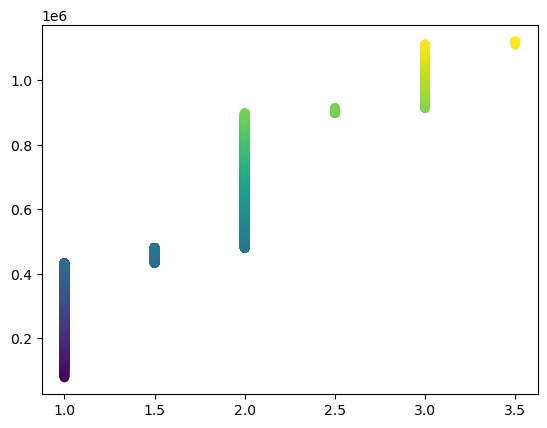

In [18]:
#Scatter plot
color_ranges = [0, 1, 2, 3, 4]  # Define price ranges for coloring
colors = ['red', 'yellow','orange', 'green']  # Define colors for each range

#A colormap based on price ranges and colors
cmap = plt.cm.get_cmap('cividis')  # Or any other colormap you prefer
norm = plt.Normalize(vmin=min(color_ranges), vmax=max(color_ranges))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Color points based on price ranges
plt.scatter(sorted_df_floors['floors'], sorted_df_price['price'], c=norm(sorted_df_price['price']))
plt.colorbar(sm, label='Price Range')  # Add a colorbar legend

plt.xlabel('Floors')
plt.ylabel('Price')
plt.title('Relationship between Floors and Price')
plt.show()

As visually represented, most houses have wither 1.0 floors or 2.0 floors, with a decent amount of houses with 3 floors, while a miniscule number have 1.5, 2.5 or 3.5 floors. The bugger the number of floors, the higher the price, with majority of people opting for the houses with 2.0 floors

**Objective 2**: To determine how the number of bedrooms impacts the price of a house in King County  

Here, we aim to fin out if the number of bedrooms impact the pricing of houses in King County. We first check the contents, arrange them in a workable state (either ascending or descending) and then plot the outcome for easier visualization

In [19]:
#checking the contents in the "bedrooms" column
df_cleaned['bedrooms']

0        3
1        3
2        2
3        4
4        3
        ..
21592    3
21593    4
21594    2
21595    3
21596    2
Name: bedrooms, Length: 17649, dtype: int64

In [20]:
#sorting them in ascending order
sorted_df_bedrooms = df_cleaned.sort_values(by=['bedrooms'])
sorted_df_bedrooms['bedrooms']

21596    2
7096     2
11965    2
7094     2
3155     2
        ..
13969    5
20195    5
5610     5
20190    5
3323     5
Name: bedrooms, Length: 17649, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_4152\1285017265.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')  # Or any other colormap you prefer


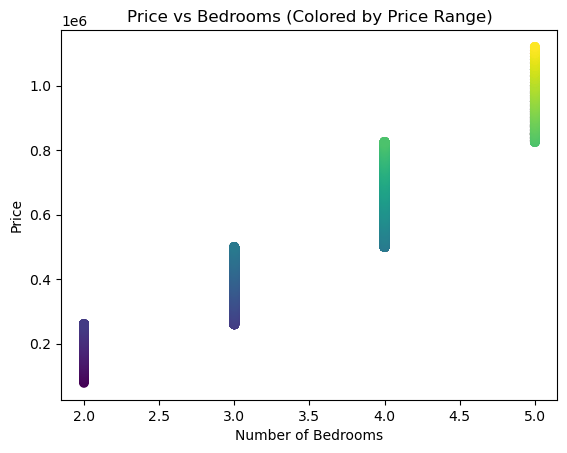

In [21]:
#Plotting
color_ranges = [0, 1, 2, 3, 4]  # Define price ranges for coloring
colors = ['red', 'yellow','orange', 'green']  # Define colors for each range

# Create a colormap based on price ranges and colors
cmap = plt.cm.get_cmap('coolwarm')  # Or any other colormap you prefer
norm = plt.Normalize(vmin=min(color_ranges), vmax=max(color_ranges))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Color points based on price ranges
plt.scatter(sorted_df_bedrooms['bedrooms'], sorted_df_price['price'], c=norm(sorted_df_price['price']))

plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Price vs Bedrooms (Colored by Price Range)')
plt.show()

As seen, the higher the number of bedrooms, the higher the pricing, with majority of houses lying between 3 and 4 bedrooms  


**Objective 3**: To examine the impact the number of bathrooms has on the price of a house in King County  
Just like with flooring and bedrooms, we first check the contents of the column, arrange them accordingly , and visualize them against pricing with the appropriate plotting

In [22]:
#Viewing contents
df_cleaned['bathrooms']

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21592    2.50
21593    2.50
21594    0.75
21595    2.50
21596    0.75
Name: bathrooms, Length: 17649, dtype: float64

In [23]:
#Sorting in Ascending order
sorted_df_bathrooms = df_cleaned.sort_values(by=['bathrooms'])
sorted_df_bathrooms['bathrooms']

21596    0.75
12038    0.75
12997    0.75
8588     0.75
3686     0.75
         ... 
10170    3.50
13191    3.50
10160    3.50
20695    3.50
19954    3.50
Name: bathrooms, Length: 17649, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_4152\3470770857.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')  # Or any other colormap you prefer


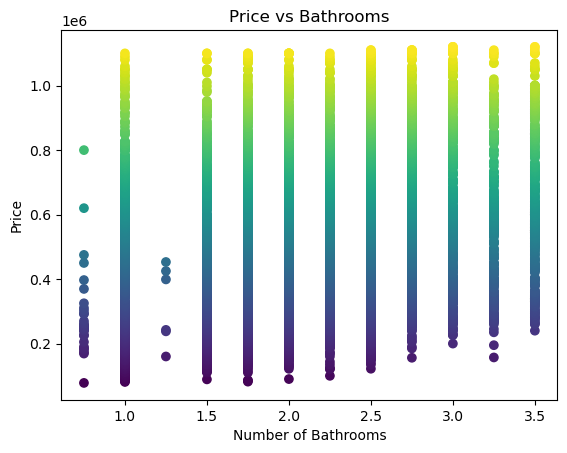

In [24]:
#Plotting
color_ranges = [0, 1, 2, 3, 4]  # Define price ranges for coloring
colors = ['red', 'yellow','orange', 'green']  # Define colors for each range

# Create a colormap based on price ranges and colors
cmap = plt.cm.get_cmap('coolwarm')  # Or any other colormap you prefer
norm = plt.Normalize(vmin=min(color_ranges), vmax=max(color_ranges))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Color points based on price ranges
plt.scatter(sorted_df_bedrooms['bathrooms'], sorted_df_price['price'], c=norm(sorted_df_price['price']))
#plt.colorbar(sm, label='Floor Range')  # Add a colorbar legend

plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Price vs Bathrooms')
plt.show()

As visually illustrated, there is minimal difference in the number of bathrooms and the pricing. In our data, even houses with as minimum as 0.75 bathrooms can still have a high pricing as other houses with more bathrooms. This illustrates that bathrooms have minimal impact on the pricing of the houses in King County

**Objective 4**: To assess the impact of renovations on the price of a house in King County  
Just like with the others, we begin by examining the content and visualizing them against Price. We don not need to sort the renovations as they are categorical data and therefore do not need sorting

In [25]:
df_cleaned['house_renovation']

0         No
1        Yes
2         No
3         No
4         No
        ... 
21592     No
21593     No
21594     No
21595     No
21596     No
Name: house_renovation, Length: 17649, dtype: object

For the plotting, we average the amount of "Yes" in renovations and plot them with the average amount of the "Price" column. The same Process is also done for the "No" Renovations. The results are then plotted in a bar chart.

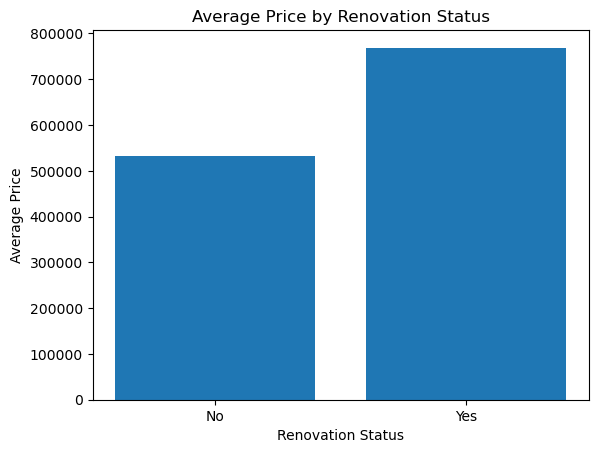

In [26]:
#Plotting
# Calculate average price for each renovation status
price_by_renovation = df.groupby('house_renovation')['price'].mean()

# Extract data for the plot
renovation_groups = price_by_renovation.index.tolist()
average_prices = price_by_renovation.tolist()

# Bar plot
plt.bar(renovation_groups, average_prices)

# Add labels and title
plt.xlabel("Renovation Status")
plt.ylabel("Average Price")
plt.title("Average Price by Renovation Status")

# Show the plot
plt.show()

As seen, The houses that are in the 'yes' category have a higher average price range as compared to the 'no' category. This shows that renovated houses in King County have higher pricing as compared to houses that are not renovated. Therefore, renovated houses are more costly than their conterparts

**Objective 5**:To evaluate how the square footage of living space of a house impacts its price in King County

We aim to find out if the square footage of living space impacts the pricing of houses in King County. We first check the contents, arrange them in a workable state (either ascending or descending) and then plot the outcome for easier visualization

In [27]:
#checking the contents in the "bedrooms" column
df_cleaned['sqft_living']

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_living, Length: 17649, dtype: int64

In [28]:
#sorting them in ascending order
sorted_df_sqft_living = df_cleaned.sort_values(by=['sqft_living'])
sorted_df_sqft_living['sqft_living']

1166      440
9632      520
12744     540
18493     550
8493      560
         ... 
20658    4210
1485     4210
20051    4220
20069    4220
10396    4230
Name: sqft_living, Length: 17649, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_4152\3537330187.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')  # Or any other colormap you prefer


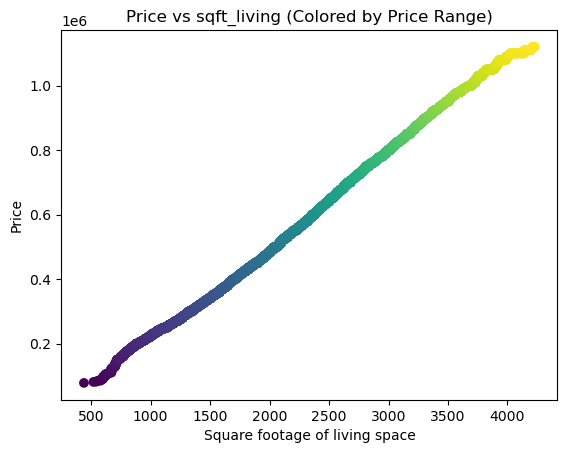

In [29]:
#Plotting
color_ranges = [0, 1, 2, 3, 4]  # Define price ranges for coloring
colors = ['red', 'yellow','orange', 'green']  # Define colors for each range

# Create a colormap based on price ranges and colors
cmap = plt.cm.get_cmap('viridis')  # Or any other colormap you prefer
norm = plt.Normalize(vmin=min(color_ranges), vmax=max(color_ranges))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Color points based on price ranges
plt.scatter(sorted_df_sqft_living['sqft_living'], sorted_df_price['price'], c=norm(sorted_df_price['price']))

plt.xlabel('Square footage of living space')
plt.ylabel('Price')
plt.title('Price vs sqft_living (Colored by Price Range)')
plt.show()

From the above plot, we can clearly see that as the square footage of living space increases, the price of the house also increases.

**Objective 6**:To evaluate which combinations of the available features in the dataset are the most impactful features for predicting sale price.


This will be evaluated using the corelation matrix  to visualize correlation between the variables in our dataset. 

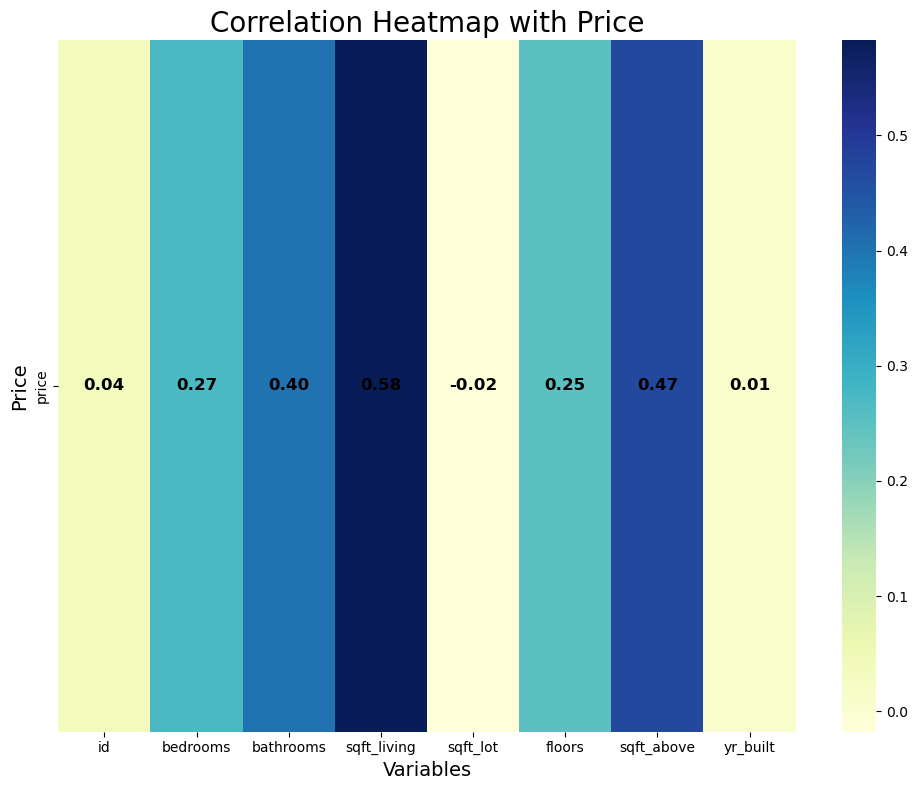

In [ ]:
#import relevant libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_columns = df_cleaned.select_dtypes(include=['int', 'float']).columns

# Calculate correlation coefficients between 'price' and other numeric columns
price_correlation = df_cleaned[numeric_columns].corr()['price']

# Creating a correlation matrix with just the correlation coefficients with 'price'
correlation_matrix = price_correlation.drop('price', axis=0).to_frame().T

# Plotting correlation matrix heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, cmap='YlGnBu')

# Add exact correlation coefficients as labels on each column
for i in range(correlation_matrix.shape[1]):
    heatmap.text(i + 0.5, 0.5, f"{correlation_matrix.iloc[0, i]:.2f}", ha='center', va='center',
                  color='black', fontsize=12, fontweight='bold', rotation=0)

plt.title('Correlation Heatmap with Price', fontsize=20)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Adjusting the layout of the plot for better visualization
plt.tight_layout()
plt.show()



From this correlation matrix above, sqft_living has the most correlation with the price followed by sqft_above and the bathrooms column.
We can use the combination of sqft_living and the bedrooms as our core combination. 

When creating our baseline model, we will use sqft_living and the price.

## MODELING 
### DATA PREPARATION FOR MODELING 
#### Checking for Linearlity 
##### The first step will be to check for linearlity among our dependent variable (Price) and our various Independent variables (Number of floors, number of bedrooms, number of bathrooms and renovation) as listed in our objective

/Applications/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


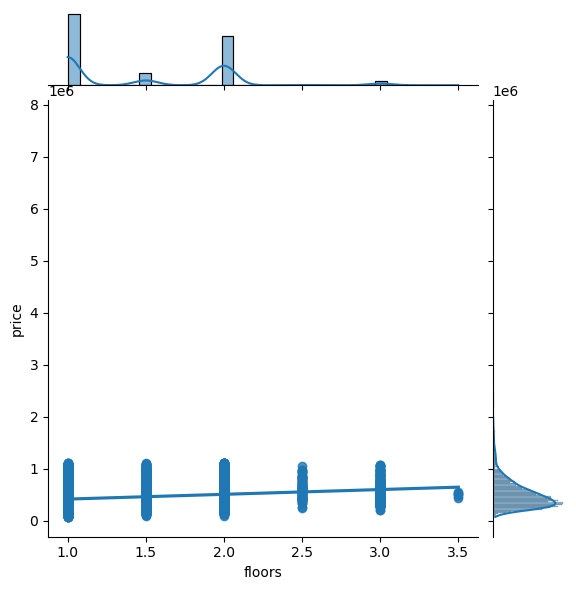

/Applications/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


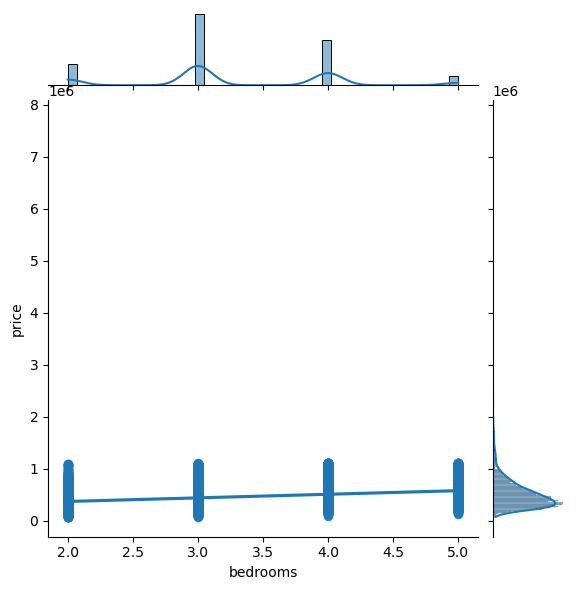

/Applications/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


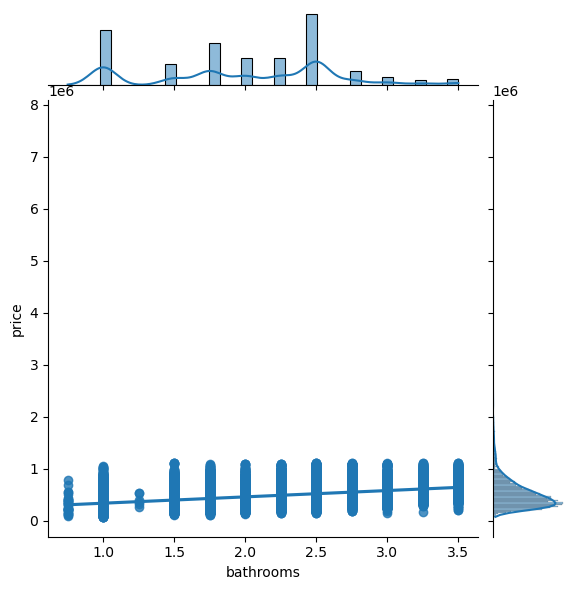

/Applications/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


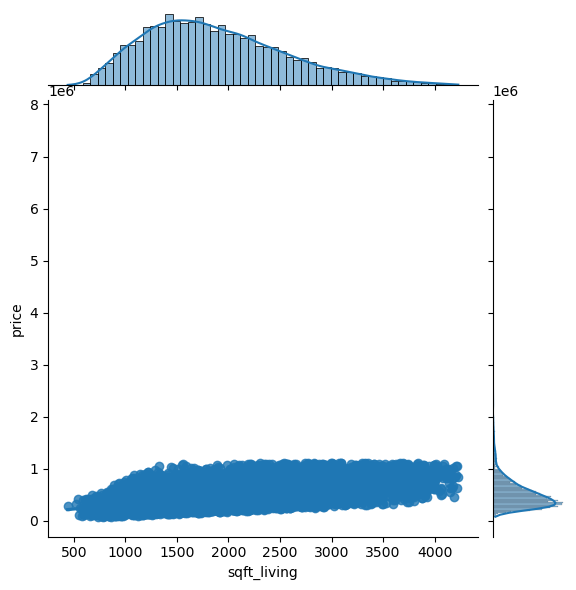

In [ ]:
# House features 
features = ['floors', 'bedrooms', 'bathrooms', 'sqft_living']


#  Plot jointplots
for feature in features:
    sns.jointplot(x = df_cleaned[feature], y = df['price'], kind = 'reg')
    plt.show()

##### From the above, we found out that the investigated features all appear linear. All the other feature variable are discrete and numeric except for the sqft_living which is continous.

## Checking for Multicolinearlity
##### Multicollinearity refers to the situation where two or more independent variables in a regression model are highly correlated with each other. This will involve the use of VIF. VIF measures how much the variance of an estimated regression coefficient increases if independent variables are correlated. Generally, a VIF greater than 10 indicates multicollinearity that may be problematic. 


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Select only numerical columns from the dataset
numerical_data = df_cleaned.select_dtypes(include=[np.number])

# Create a DataFrame to store VIF results
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_data.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_data.values, i) for i in range(len(numerical_data.columns))]

# Print the VIF DataFrame
print(vif_data)

          Feature       VIF
0              id  3.801282
1           price  2.659814
2        bedrooms  1.684719
3       bathrooms  2.966026
4     sqft_living  6.698499
5        sqft_lot  2.411943
6          floors  2.537105
7      sqft_above  5.558802
8        yr_built  2.063765
9         zipcode  0.545608
10            lat  1.592005
11           long  1.768305
12  sqft_living15  2.728926
13     sqft_lot15  1.971458


#### Features with VIF values greater than 5 (sqft_living and sqft_above) are concerning because they exhibit a high multicollinearity. The others exhibit a multicollinearity effect that is not problematic. 





# 5.0 MODELING

## 5.1 SIMPLE LINEAR REGRESSION

In [ ]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import OLS
import statsmodels.formula.api as sfm
import statsmodels.api as sm
%matplotlib inline

### 5.1.1 Baseline model :price vs sqft-living

#### 1.setting up variables for regression

Declaring y and X_baseline variables, where y is a Series containing price data and X_baseline is a DataFrame containing the column with the target variable,sqft_living.

In [ ]:
y = df_cleaned['price'] #dependent variable
#X_baseline = X
#independent variable
X = df_cleaned['sqft_living']

#### 2. creating and fitting simple liner regression

In [ ]:
baseline_model = sm.OLS(endog=y, exog=sm.add_constant(X))
baseline_results = baseline_model.fit()

#### 3. evaluating  and interpreting baseline results

In [ ]:
#baseline_model = sm.OLS(endog=y, exog=sm.add_constant(X))
#baseline_results = baseline_model.fit()
results_summary = print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     9091.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        11:07:41   Log-Likelihood:            -2.3755e+05
No. Observations:               17702   AIC:                         4.751e+05
Df Residuals:                   17700   BIC:                         4.751e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.41e+05   3592.781     39.247      

### Interpretation of results

From the model results summary we notice that:

1.our model explains a variance of about 33.9% in the price of a house since our r-squared = 0.339

2.Assuming an alpha of 0.05 our model is statistically significant since our fpvalue statistic is 0.00 which is way 
less than our alpha 

3.Noticed that when sqft_living(square foot living ) is equal to zero,the price of a house is $ 141,000.since our consant is 1.41e+05

4.Also for every one unit change in sqft_living,then the price of the house increases by $ 171 ,since the coefficient of sqft_living is 170.5686

5.All the coefficients of the model are statistical signifiacnt since their fpvalue is equal to 0 this is less than 0.05

6.The model has a high F-statistic of  9091.0 and this is a strong indicator that sqft_living jointly have a statistically significant relationship with the,price of a house ,that is the dependent variable

#### 4.checking normality of residuals

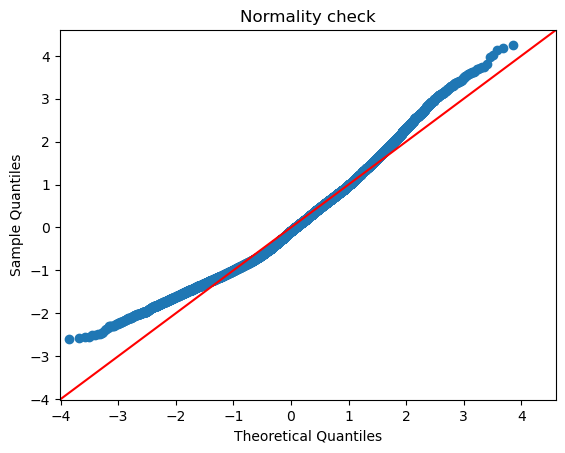

In [ ]:
residuals = baseline_results.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
plt.show()


##### Conclusion: The QQ plot shows atleast the residuals have a normal distribution.

### 5.1.2 2nd model: price vs bedrooms

#### 1.setting up variables for regression

Declaring y and X variables, where y is a Series containing price data and X is a DataFrame containing the column with the target variable,bedrooms.

In [ ]:
 #dependent variable
y_1 = df_cleaned['price']

#X tis is my independent variable
X_1 = df_cleaned['bedrooms']

#### 2. creating and fitting simple liner regression

In [ ]:
baseline_model_1 = sm.OLS(endog=y_1, exog=sm.add_constant(X_1))
baseline_results = baseline_model_1.fit()

#### 3. evaluating  and interpreting baseline results

In [ ]:
#baseline_model = sm.OLS(endog=y, exog=sm.add_constant(X))
#baseline_results = baseline_model.fit()
results_summary = print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1403.
Date:                Wed, 01 May 2024   Prob (F-statistic):          1.81e-295
Time:                        11:07:47   Log-Likelihood:            -2.4054e+05
No. Observations:               17702   AIC:                         4.811e+05
Df Residuals:                   17700   BIC:                         4.811e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.358e+05   6240.049     37.786      0.0

### Interpretation of results

From the model results summary we notice that:

1.our model explains a variance of about 7.3% in the price of a house since our r-squared = 0.073 which is way less as 
compared to 34% in our previous model.

2.Assuming an alpha of 0.05 our model is statistically significant since our fpvalue statistic is too small and close to 0 and it is 
less than our alpha 

3.Noticed that when the number of bedrooms is equal to zero,the price of a house is $ 235,800 .since our consant coefficient is 2.358e+05

4.Also for every one unit change in the number of bedrooms,then the price of the house increases by $ 69,180  ,since the coefficient of bedrooms is 6.918e+04 

5.All the coefficients of the model are statistical signifiacnt since their fpvalue is equal to 0 this is less than 0.05

6.The model has a relatively low F-statistic of 1403.0 as compared to F-statistic of 9091.0 and this is a weak indicator that the number of bedrooms jointly have a statistically significant relationship with the,price of a house ,that is the dependent variable

#### 4.checking normality of residuals

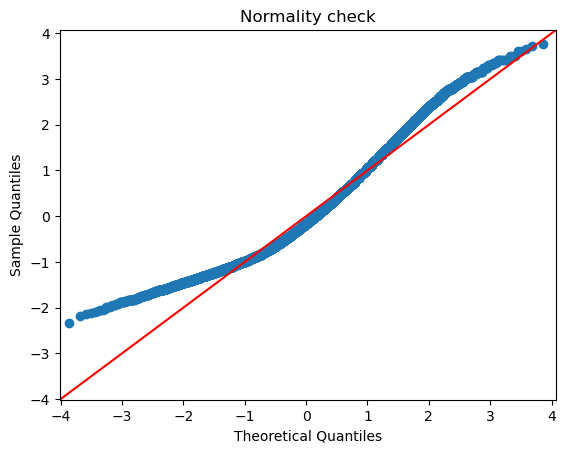

In [ ]:
residuals = baseline_results.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
plt.show()


### 5.1.3 3rd model : price vs no_of_floors

#### 1.setting up variables for regression

Declaring y and X variables, where y is a Series containing price data and X is a DataFrame containing the column with the target variable,number of floors.

In [ ]:
#dependent variable
y_2 = df_cleaned['price']

#X tis is my independent variable
X_2 = df_cleaned['floors']

#### 2. creating and fitting simple liner regression

In [ ]:
baseline_model_2 = sm.OLS(endog=y_2, exog=sm.add_constant(X_2))
baseline_results = baseline_model_2.fit()

#### 3. evaluating  and interpreting baseline results

In [ ]:
#baseline_model = sm.OLS(endog=y, exog=sm.add_constant(X))
#baseline_results = baseline_model.fit()
results_summary = print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     1167.
Date:                Wed, 01 May 2024   Prob (F-statistic):          1.10e-247
Time:                        11:07:54   Log-Likelihood:            -2.4065e+05
No. Observations:               17702   AIC:                         4.813e+05
Df Residuals:                   17700   BIC:                         4.813e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.28e+05   4215.654     77.801      0.0

#### 4.checking normality of residuals


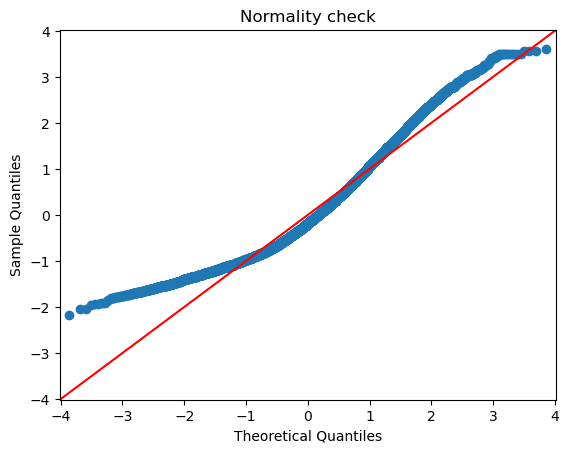

In [ ]:
residuals = baseline_results.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
plt.show()

### Interpretation of results

From the model results summary we notice that:

1.our model explains a variance of about 6.2% in the price of a house since our r-squared = 0.062 which is way less as 
compared to 34% in our previous model.

2.Assuming an alpha of 0.05 our model is statistically significant since our fpvalue statistic is too small and close to 0 and it is 
less than our alpha 

3.Noticed that when the number of floors is equal to zero,the price of a house is $ 328,000. .since our consant coefficient is 3.28e+05

4.Also for every one unit change in the number of floors,then the price of the house increases by $ 91,730.  ,since the coefficient of floors is 9.173e+04 

5.All the coefficients of the model are statistical signifiacnt since their fpvalue is equal to 0 this is less than 0.05

6.The model has a relatively low F-statistic of 1167.0 as compared to F-statistic of 9091.0 and this is a weak indicator that the number of floors jointly have a statistically significant relationship with the,price of a house ,that is the dependent variable

## 5.2 MULTIPLE LINEAR REGRESSION

### 5.2.1  price vs no_of_bedrooms,sqftliving

#### 1.setting up variables for regression

Declaring y and X variables, where y is a Series containing price data transformed to log price and X is a DataFrame containing the columns of bedrooms variable,and sqfliving.

In [ ]:
y_3 = df_cleaned['price']
df_cleaned['log_price'] = np.log(df_cleaned['price'])

#X tis is my independent variable
#X_3 = df_cleaned["sqft_living","bedrooms"]

X_3 = df_cleaned[['sqft_living', 'bedrooms']]




#### 2. creating and fitting multiple liner regression

In [ ]:
# create model intercept
predictors_int = sm.add_constant(X_3)

# fitting  model
second_model = sm.OLS(df_cleaned['log_price'], predictors_int).fit()



#### 3. evaluating  and interpreting baseline results

In [ ]:
# check the model results
print(second_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     4455.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        11:08:02   Log-Likelihood:                -6864.2
No. Observations:               17702   AIC:                         1.373e+04
Df Residuals:                   17699   BIC:                         1.376e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.3967      0.012   1072.270      

### Interpretation of results

From the model results summary we notice that:

1.our model explains a variance of about 33.5% in the price of a house since our r-squared = 0.335 which is way less as 
compared to 34% in our previous model.

2.Assuming an alpha of 0.05 our model is statistically significant since our fpvalue statistic is 0 and it is definetly
less than our alpha 

3.Noticed that when sqft_living is equal to zero and the number of bedrooms is also equal to zero,the price of a house is $ 1240. .since our consant coefficient is 12.3967

4.Also for every one unit change in sqft_living ,then the price of the house increases by $ 0.04,since the coefficient of sqft_living is 0.0004

5.Also for every one unit change in the number of bedrooms,then the price of the house decreases by $ 6.8.  ,since the coefficient of number of bedrooms is -0.0675 

6.All the coefficients of the model are statistical signifiacnt since their fpvalue is equal to 0 this is less than 0.05

7.The model has a relatively low F-statistic of 4455.0  as compared to F-statistic of 9091.0 and this is a weak indicator that the number of floors and sqft_living jointly have a statistically significant relationship with the,price of a house ,that is the dependent variable

#### 4.checking normality of residuals

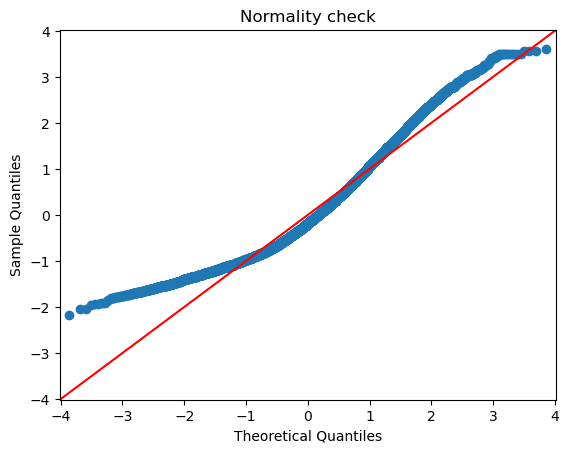

In [ ]:
residuals = baseline_results.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
plt.show()

### 5.2.1  price vs no_of_bedrooms,sqftliving,floors

In [ ]:
y_4 = df_cleaned['price']
df_cleaned['log_price'] = np.log(df_cleaned['price'])

#X tis is my independent variable
#X_3 = df_cleaned["sqft_living","bedrooms"]

X_4= df_cleaned[['sqft_living', 'bedrooms','floors']]



#### 2. creating and fitting multiple liner regression

In [ ]:
# create model intercept
predictors_int = sm.add_constant(X_4)

# fitting  model
second_model = sm.OLS(df_cleaned['log_price'], predictors_int).fit()


#### 3. evaluating  and interpreting baseline results

In [ ]:
# check the model results
print(second_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     3048.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        11:08:08   Log-Likelihood:                -6787.2
No. Observations:               17702   AIC:                         1.358e+04
Df Residuals:                   17698   BIC:                         1.361e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.3253      0.013    957.990      

### Interpretation of results

From the model results summary we notice that:

Overall the model performed marginally better than the baseline model

1.our model explains a variance of about 34.1% in the price of a house since our r-squared = 0.341 which is higher compared to the pprevious models.

2.Assuming an alpha of 0.05 our model is statistically significant since our fpvalue statistic is 0 and it is definetly
less than our alpha 

3.Noticed that when sqft_living is equal to zero,the number of bedrooms is also equal to zero,and number of floors is equal to zero the price of a house is $ 1233. .since our consant coefficient is 12.325

4.Also for every one unit change in sqft_living ,then the price of the house increases by $ 0.04,since the coefficient of sqft_living is 0.0004

5.Also for every one unit change in the number of bedrooms,then the price of the house decreases by $ 6.35.  ,since the coefficient of number of bedrooms is -0.0635 

6.Also for every one unit change in the number of floors,then the price of the house increases by $ 6.49  ,since the coefficient of number of floors is 0.0649

7.All the coefficients of the model are statistical signifiacnt since their fpvalue is equal to 0 this is less than 0.05

8.The model has a relatively low F-statistic of 3048  as compared to F-statistic of 9091.0 and this is a weak indicator that the number of floors,number of bedrooms and sqft_living jointly have a statistically significant relationship with the,price of a house ,that is the dependent variable


#### 4.checking normality of residuals

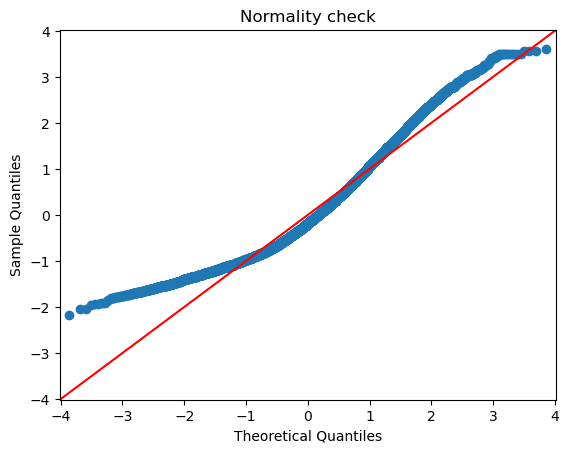

In [ ]:
residuals = baseline_results.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
plt.show()

##### conclusion: Note that 2/3 of the assumptions of linearity are violated here - the residuals aren't normally distributed, We'll get a summary of the model as is, see if not performing a log transformation on price  will help with these conditions, and improve our R^2 .

#### correcting the multiple linear regression model

In [ ]:
y_5 = df_cleaned['price']

#X tis is my independent variable
#X_3 = df_cleaned["sqft_living","bedrooms"]

X_5= df_cleaned[['sqft_living', 'bedrooms','floors']]

#### 2. creating and fitting simple liner regression

In [ ]:
# create model intercept
predictors_int = sm.add_constant(X_5)

# fitting  model
second_model = sm.OLS(df_cleaned['price'], predictors_int).fit()


#### 3. evaluating  and interpreting baseline results

In [ ]:
# check the model results
print(second_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     3223.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        11:08:13   Log-Likelihood:            -2.3736e+05
No. Observations:               17702   AIC:                         4.747e+05
Df Residuals:                   17698   BIC:                         4.748e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.853e+05   5837.714     31.740      

### Interpretation of results

1.our model explains a variance of about 35.3% in the price of a house since our r-squared = 0.353 which is higher compared to the pprevious models.

2.Assuming an alpha of 0.05 our model is statistically significant since our fpvalue statistic is 0 and it is definetly
less than our alpha 

3.Noticed that when sqft_living is equal to zero,the number of bedrooms is also equal to zero,and number of floors is equal to zero the price of a house is $ 185,300. .since our consant coefficient is 1.853e+05

4.Also for every one unit change in sqft_living ,then the price of the house increases by $ 188,since the coefficient of sqft_living is 188.096

5.Also for every one unit change in the number of bedrooms,then the price of the house decreases by $ 32,790 ,since the coefficient of number of bedrooms is -3.279e+04

6.Also for every one unit change in the number of floors,then the price of the house increases by $ 20,620,since the coefficient of number of floors is 2.062e+04

7.All the coefficients of the model are statistical signifiacnt since their fpvalue is equal to 0 this is less than 0.05

8.The model has a relatively low F-statistic of 3223  as compared to F-statistic of 9091.0 and this is a weak indicator that the number of floors,number of bedrooms and sqft_living jointly have a statistically significant relationship with the,price of a house ,that is the dependent variable

#### 4.checking normality of residuals

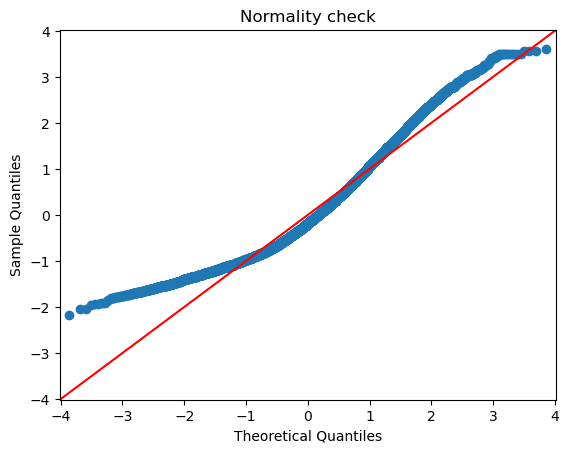

In [ ]:
residuals = baseline_results.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
plt.show()

##### conclusion there is no much improvement on the model though our r-squared has increased from 0.34 to 0.353 meaning the model explains a greater variance on the price

# 6.0 CONCLUSION / RECOMMENDATIONS

## a) CONCLUSION

From our models we noted the following

1.With less bedrooms or 0 bedrooms the price of a house is higher,that is the more the number of bedrooms the lower the 
price of that house

2.For every additional square foot of living space the price of a house increases

3.For every additional number of floors then the price of a house increases

4.After carrying out the multiple linear regression of all the variables,the number of bedrooms and number of floors seemed to have a higher impact on the price of a house as opposed to to the sqft_living,that is the less the number of bedrooms the higher the price of a house and the more the number of floors the higher the price of the house.

## b) RECOMMENDATIONS

1.Bedrooms: Considering the impact of the number of bedrooms on the house price.I would advise the homeowners to focus on properties with a lower bedroom count so that in return it will lead to an increase in price of the house.


2.Square Foot living: Pay attention to the square footage of the living space. Increasing the living space generally increases the house price.

3.Floors: Houses with multiple floors tend to have higher prices. If feasible, explore opportunities to add or emphasize multiple floors in properties to increase their perceived value.



**Next Steps**

1. Refine the multiple linear regression model by incorporating additional variables that may influence house prices, they include the condition of the house and the age of the house.
2. Explore the relationship between the number of bedrooms and house prices in more detail. Investigate whether there are specific bedroom configurations that have a greater impact on house prices, e.g., master suites.
3. Validate the findings and recommendations using different datasets to ensure that the recommendations and findings are solid and broadly applicable.